# A Game of Thrones tutorial

Game of Thrones (GoT) is an American fantasy drama TV series, created by D. Benioff and D.B. Weiss for the American television network HBO. It is the screen adaption of the series of fantasy novels *A Song of Ice and Fire*, written by George R.R. Martin. The series premiered on HBO in the United States on April 17, 2011, and concluded on May 19, 2019, with 73 episodes broadcast over eight seasons. With its 12 million viewers during season 8 and a plethora of awards---according to [Wikipedia](https://en.wikipedia.org/wiki/Game_of_Thrones), Game of Thrones has attracted record viewership on HBO and has a broad, active, and international fan base. 

The intricate world narrated by George R.R. Martin and scripted by Benioff and Weiss has stimulated the curiosity of ranks of scientists, delighted by the opportunity to study complex social phenomena. In this notebook, we delve into the study of GoT relationships to discover what the hypergraphs they generate reveal about the story.

In this notebook, we replicate some of the analysis you can read in our paper at this [link](https://www.internetmathematicsjournal.com/article/12464-analyzing-exploring-and-visualizing-complex-networks-via-hypergraphs-using-simplehypergraphs-jl)!

## What we need... installing and loading packages

In [1]:
using Pkg

In [ ]:
pkg"add PyCall Conda SimpleHypergraphs PyPlot"

#### Prerequisites for plotting

In [2]:
using PyCall
using Conda

In [3]:
Conda.runconda(`install matplotlib --yes`)
Conda.runconda(`install networkx --yes`)
run(`$(PyCall.python) -m pip install hypernetx`)

┌ Info: Downloading miniconda installer ...
└ @ Conda C:\Users\aless\.julia\packages\Conda\3rPhK\src\Conda.jl:156
┌ Info: Installing miniconda ...
└ @ Conda C:\Users\aless\.julia\packages\Conda\3rPhK\src\Conda.jl:166


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\aless\.julia\conda\3

  added / updated specs:
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h7a1dbc1_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h62dcd97_0
    - conda==4.8.2=py37_0
    - console_shortcut==0.1.1=4
    - cryptography==2.8=py37h7a1dbc1_0
    - idna==2.8=py37_0
    - menuinst==1.4.16=py37he774522_0
    - openssl==1.1.1d=he774522_4
    - pip==20.0.2=py37_1
    - powershell_shortcut==0.0.1=3
    - pycosat==0.6.3=py37he774522_0
    - pycparser==2.19=py37_0
    - pyopenssl==19.1.0=py37_0
    - pysocks==1.7.1=py37_0
    - python==3.7.6=h60c2a47_2
    - pywin32==227=py37he774522_1
    - requests==2.22.0=py37_1
    - ruamel_yaml==0.15.87=py37he774522_0
    - setuptools==45.2.0=py37_0
    - six==1.14.0=py37_0
    - sqlite==3.31.1=he774522_0
    - tqdm==4.42.1=py_0
    - urllib3==1.25.

WARNING conda.core.envs_manager:register_env(52): Unable to register environment. Path not writable or missing.
  environment location: C:\Users\aless\.julia\conda\3
  registry file: C:\Users\aless\.conda\environments.txt
DEBUG menuinst_win32:__init__(199): Menu: name: 'Anaconda${PY_VER} ${PLATFORM}', prefix: 'C:\Users\aless\.julia\conda\3', env_name: '3', mode: 'user', used_mode: 'user'
DEBUG menuinst_win32:create(324): Shortcut cmd is %windir%\System32\cmd.exe, args are ['"/K"', 'C:\\Users\\aless\\.julia\\conda\\3\\Scripts\\activate.bat', 'C:\\Users\\aless\\.julia\\conda\\3']


done


DEBUG menuinst_win32:__init__(199): Menu: name: 'Anaconda${PY_VER} ${PLATFORM}', prefix: 'C:\Users\aless\.julia\conda\3', env_name: '3', mode: 'user', used_mode: 'user'
DEBUG menuinst_win32:create(324): Shortcut cmd is %windir%\System32\WindowsPowerShell\v1.0\powershell.exe, args are ['-ExecutionPolicy', 'ByPass', '-NoExit', '-Command', '"& \'C:\\Users\\aless\\.julia\\conda\\3\\shell\\condabin\\conda-hook.ps1\' ; conda activate \'C:\\Users\\aless\\.julia\\conda\\3\' "']


Processed C:\Users\aless\.julia\conda\3\Menu\console_shortcut.json successfully.
Processed C:\Users\aless\.julia\conda\3\Menu\powershell_shortcut.json successfully.


┌ Info: Running `conda config --add channels defaults --file 'C:\Users\aless\.julia\conda\3\condarc-julia.yml' --force` in root environment
└ @ Conda C:\Users\aless\.julia\packages\Conda\3rPhK\src\Conda.jl:113
┌ Info: Running `conda update -y conda` in root environment
└ @ Conda C:\Users\aless\.julia\packages\Conda\3rPhK\src\Conda.jl:113


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\aless\.julia\conda\3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.1         |           py37_0         156 KB
    conda-4.8.3                |           py37_0         2.8 MB
    conda-package-handling-1.6.1|   py37h62dcd97_0         612 KB
    cryptography-2.9.2         |   py37h7a1dbc1_0         523 KB
    idna-2.9                   |             py_1          49 KB
    openssl-1.1.1g             |       he774522_0         4.8 MB
    pip-20.0.2                 |           py37_3         1.7 MB
    pycparser-2.20             |             py_0          92 KB
    requests-2.23.0            |           py37_0          93 KB
    setuptools-47.1.1          |           py37_0         538 KB
    six-1.15.0                 |             py_0 

┌ Info: Running `conda install matplotlib --yes` in root environment
└ @ Conda C:\Users\aless\.julia\packages\Conda\3rPhK\src\Conda.jl:113


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\aless\.julia\conda\3

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB
    cycler-0.10.0              |           py37_0          13 KB
    freetype-2.9.1             |       ha9979f8_1         450 KB
    icc_rt-2019.0.0            |       h0cc432a_1         6.0 MB
    icu-58.2                   |       ha925a31_3         9.4 MB
    intel-openmp-2020.1        |              216         1.6 MB
    jpeg-9b                    |       hb83a4c4_2         245 KB
    kiwisolver-1.2.0           |   py37h74a9793_0          55 KB
    libpng-1.6.37              |       h2a8f88b_0         333 KB
    matplotlib-3.1.3           |           py37_0          22 KB
    matplotlib-base-3.1.3      |   py37h64f37c

┌ Info: Running `conda install networkx --yes` in root environment
└ @ Conda C:\Users\aless\.julia\packages\Conda\3rPhK\src\Conda.jl:113


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\aless\.julia\conda\3

  added / updated specs:
    - networkx


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    decorator-4.4.2            |             py_0          14 KB
    networkx-2.4               |             py_0         1.1 MB
    ------------------------------------------------------------
                                           Total:         1.1 MB

The following NEW packages will be INSTALLED:

  decorator          pkgs/main/noarch::decorator-4.4.2-py_0
  networkx           pkgs/main/noarch::networkx-2.4-py_0



networkx-2.4         | 1.1 MB    | ########## | 100% 
decorator-4.4.2      | 14 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Process(`'C:\Users\aless\AppData\Local\Programs\Python\Python36\python.exe' -m pip install hypernetx`, ProcessExited(0))

In [89]:
using SimpleHypergraphs
using LightGraphs
using PyPlot

## The data set
This study is based on the dataset at the GitHub repository of Jeffrey Lancaster [Game of Thrones Datasets and Visualizations](https://github.com/jeffreylancaster/game-of-thrones). We will thus focus on the GoT TV series.

We studied GoT characters' co-occurrences with different levels of granularity. We modeled the GoT data set building three different types of hypergraphs, each one reporting whether the GoT characters have appeared in the same **season**, in the same **episode**, or in the same **scene** together.

## Hypergraph with each *season* as an edge

First, we load a hypergraph studying characters' co-occurences within seasons. Here, the hyperedges are the GoT seasons and the characters who appear in each eason are the nodes.

In [5]:
h = SimpleHypergraphs.hg_load("data/hg_seasons_all.json"; format=JSON_Format(), T=Bool, V=Symbol, E=Symbol);

In [6]:
# how many characters did we see during the overall TV series?
size(h)[1]

577

In [7]:
# how many characters does each season have?
# we can ask this way...
map(he -> println("Season $he has $(length(getvertices(h, he))) characters"), 1:nhe(h));

Season 1 has 125 characters
Season 2 has 137 characters
Season 3 has 137 characters
Season 4 has 152 characters
Season 5 has 175 characters
Season 6 has 208 characters
Season 7 has 75 characters
Season 8 has 66 characters


In [8]:
# ... or this way
length.(h.he2v)

8-element Array{Int64,1}:
 125
 137
 137
 152
 175
 208
  75
  66

**SimpleHypergraphs** integates the Python library **HyperNetX** to let the user visualize a hypergraph `h` exploiting an Euler-diagram visualization. For more details, please refer to the library [HyperNetX](https://github.com/pnnl/HyperNetX).

In [9]:
# Let's visualize (a smaller parte of) the hypergraph we built
# To build this smaller hypergraph, we considered only those characters 
# appearing at least in 10 scenes in the whole series
h1 = SimpleHypergraphs.hg_load("data/hg_seasons_min.json"; format=JSON_Format(), T=Int, V=Symbol, E=Symbol);

In [10]:
map(he -> 
    println("Season $he has *$(length(getvertices(h1, he)))* characters appearing in at least 10 scenes"), 
    1:nhe(h));

Season 1 has *69* characters appearing in at least 10 scenes
Season 2 has *74* characters appearing in at least 10 scenes
Season 3 has *83* characters appearing in at least 10 scenes
Season 4 has *83* characters appearing in at least 10 scenes
Season 5 has *75* characters appearing in at least 10 scenes
Season 6 has *98* characters appearing in at least 10 scenes
Season 7 has *56* characters appearing in at least 10 scenes
Season 8 has *44* characters appearing in at least 10 scenes


In [11]:
length.(h1.he2v)

8-element Array{Int64,1}:
 69
 74
 83
 83
 75
 98
 56
 44

In [12]:
# viz params: edge labels
edge_labels = Dict{Int, String}(map(x -> x=>"S$x", 1:nhe(h)))
edge_labels_kwargs = Dict{String,Any}("fontsize" => "x-large")
;

In [13]:
# viz params: figure
width = 3
height = 3
fig = plt.figure(figsize=[width,height])
;

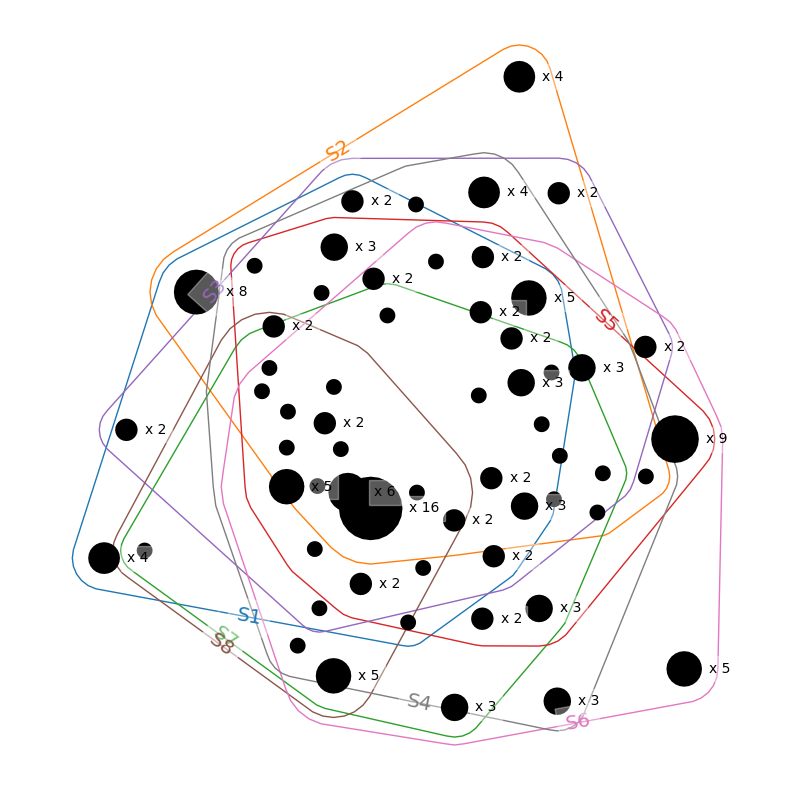

In [16]:
SimpleHypergraphs.draw(
    h1, 
    HyperNetX;
    no_border=true,
    collapse_nodes=true, 
    with_node_counts=true, 
    with_node_labels=true,
    edge_labels=edge_labels, 
    edge_labels_kwargs=edge_labels_kwargs
)

In [17]:
# who are the characters appearing in all 8 seasons?
most_important_character_ids = findall(x->x==1, (length.(h.v2he) .== 8))

for id in most_important_character_ids
    println(SimpleHypergraphs.get_vertex_meta(h, id))
end

White_Walker
Jon_Snow
Sansa_Stark
Arya_Stark
Theon_Greyjoy
Cersei_Lannister
Jaime_Lannister
Tyrion_Lannister
Daenerys_Targaryen
Jorah_Mormont
Drogon
Rhaegal
Viserion
Lord_Varys
Samwell_Tarly
Bronn


## Hypergraph with each scene as an edge

In [18]:
# Let's have a closer look of what's happening in season 8
h8 = SimpleHypergraphs.hg_load("data/hg_season8.json"; format=JSON_Format(), T=Bool, V=Symbol, E=Symbol);

In [19]:
# how many characters do we have? How many scenes?
"$(nhv(h8)) characters and $(nhe(h8)) scenes"

"66 characters and 871 scenes"

### The collaboration structure of Game of Thrones.
At this point, we had an overview about how many characters appeared over the whole GoT TV series and which one of them made it till the end.

Let's find out how these characters interacted with each other in season 8. To gather insights within these complex relationships, we run a community detection algorithm on the hypergraph built considering scenes as hyperedges.

Running this algorithm, we expect to find coherent plotlines and, therefore, groups of characters frequently appearing in a scene together.

In [67]:
# We used the label propagation algorithm
cflp = CFLabelPropagationFinder(100,1234)

comms = findcommunities(h8, cflp)

"We found $(length(comms.np)) communities in the hypergraph of the 8th season."

"We found 5 communities in the hypergraph of the 8th season."

In [66]:
# How many characters are there in each community?
length.(comms.np)

5-element Array{Int64,1}:
  3
 59
  1
  2
  1

In [58]:
# Who are they?
for c in comms.np
    for character in c
       println(get_vertex_meta(h8, character)) 
    end
    println("-----")
end

Eleanor
Eleanor's_Daughter
-----
Arya_Stark
Grey_Worm
Samwell_Tarly
Teela
Maester_Wolkan
Martha
Eddison_Tollett
Euron_Greyjoy
Northern_Guard
Lord_#4
Unsullied_Soldier
Tyrion_Lannister
Robett_Glover
Rhaegal
Yara_Greyjoy
The_Night_King
Lyanna_Mormont
Qyburn
Yohn_Royce
Lord_#2
Lord_#3
White_Walker
Gilly
Daenerys_Targaryen
Theon_Greyjoy
Fergus
Drogon
Harry_Strickland
Ghost
Willa
Bronn
Melisandre
Tormund_Giantsbane
Gendry
Lord_Varys
Jaime_Lannister
Edmure_Tully
Jon_Snow
Robin_Arryn
Alys_Karstark
Lannister_Guard
Baby_Sam
Village_Woman
Bran_Stark
Dornish_Lord
Podrick_Payne
Missandei
Ned_Umber
Viserion
Brienne_of_Tarth
Sandor_Clegane
Davos_Seaworth
Wun_Wun_Wight
Gregor_Clegane
Qhono
Jorah_Mormont
Lord_#1
Cersei_Lannister
Beric_Dondarrion
Sansa_Stark
-----
Marei
Dirah
Craya
-----
Winterfell_Boy
-----


### Which are the most important characters?
Identifying truly important and influential characters in a vast narrative like GoT may not be a trivial task, as it depends on the considered level of granularity. In these cases, the main character(s) in each plotline is referred with the term fractal protagonist(s), to indicate that the answer to "who is the protagonist" depends on the specific plotline.

#### Degree centrality
Who are the characters that apper in the majority of the scenes?

In [72]:
degrees = Dict{Int, Int}()

for v=1:nhv(h8)
    degrees[v] = length(gethyperedges(h8, v))
end

sorted_degrees = sort(collect(degrees), by=x->x[2], rev=true);

In [84]:
# Let's plot these data
characters = Array{String, 1}()
degrees = Array{Int, 1}()

max_c = 0

# we will visualize only characters appearing in at least 15 scenes
for c in sorted_degrees
    max_c = max_c > 15 ? break : max_c + 1

    push!(characters, string(get_vertex_meta(h8, c.first)))
    push!(degrees, c.second)
end

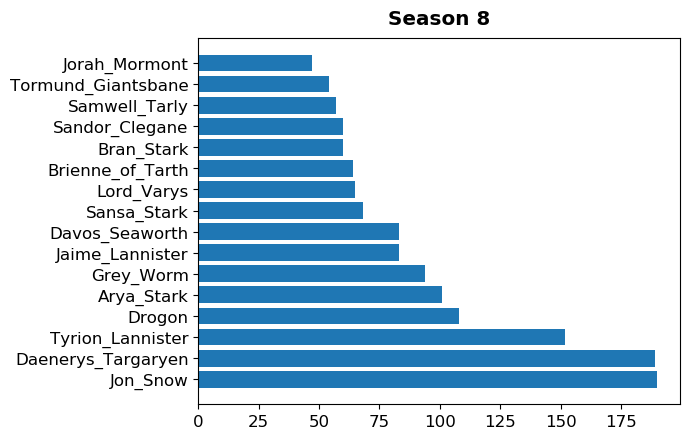

In [86]:
pos = collect(1:length(characters))

fig = plt.figure(figsize=(7, 4.5)) 
ax = fig.add_subplot(111)

rects = ax.barh(
    pos,
    degrees,
    align="center",
    tick_label=characters
)

#plt.tight_layout(.5)
plt.tick_params(labelsize="large")

plt.title("Season 8", pad=10, fontweight="semibold", fontsize="x-large")

plt.tight_layout()

#### Betweenness centrality
We investigated the importance of the characters also evaluating the betweenness centrality (BC) metric of hypergraph nodes. BC measures the centrality of a node by computing the number of times that a node acts as a bridge between the other two nodes, considering the shortest paths between them.

Here, we used the concept of *s-beetwennes-centrality*. Check out the paper for more detail about this metric.

In [102]:
# Here we evaluate betweennes value considering 1-paths, 2-paths, and 3-paths.
betweeness = Dict{Int, Dict{Symbol, Float64}}()

for s=1:3
    A = SimpleHypergraphs.adjacency_matrix(h8; s=s)
    G = LightGraphs.SimpleGraph(A)
    bc = LightGraphs.betweenness_centrality(G)

    for v=1:nhv(h8)
        push!(
            get!(betweeness, s, Dict{Symbol, Int}()),
            get_vertex_meta(h8, v) => bc[v]
        )
    end
end

In [103]:
sorted_betweeness = Dict{Int, Any}()

for s=1:3
    d = get!(betweeness, s, Dict{Symbol, Int}())
    d_sorted = sort(collect(d), by=x->x[2], rev=true)

    # println(typeof(d_sorted))
    # println(d_sorted)

    push!(
        sorted_betweeness,
        s => d_sorted
    )

end

In [109]:
sorted_betweeness

Dict{Int64,Any} with 3 entries:
  2 => [:Bronn=>0.0782042, :Tyrion_Lannister=>0.0704901, :Arya_Stark=>0.0678864…
  3 => [:Tyrion_Lannister=>0.0643147, :Arya_Stark=>0.0612823, :Jon_Snow=>0.0541…
  1 => [:Tyrion_Lannister=>0.101183, :Arya_Stark=>0.0767701, :Davos_Seaworth=>0…

In [112]:
# Getting top 10 characters for each s-value
#character => (HG_degree, G_degree)
data = Dict{Symbol, Array{Float64, 1}}()

for s=1:3
    higher_degree_characters = sorted_betweeness[s][1:10]

    for elem in higher_degree_characters
        if !haskey(data, elem.first)
            if s==1
                push!(
                    get!(data, elem.first, Array{Float64, 1}()),
                    elem.second,
                    betweeness[2][elem.first],
                    betweeness[3][elem.first]
                )
            elseif s==2
                push!(
                    get!(data, elem.first, Array{Float64, 1}()),
                    betweeness[1][elem.first],
                    elem.second,
                    betweeness[3][elem.first]
                )
            else
                push!(
                    get!(data, elem.first, Array{Float64, 1}()),
                    betweeness[1][elem.first],
                    betweeness[2][elem.first],
                    elem.second
                )
            end
        end
    end
end

# println(data)

#by highest betweenes degree in the graph, s=1
sorted_data = sort(collect(data), by=x->x[2][1], rev=true)

14-element Array{Pair{Symbol,Array{Float64,1}},1}:
   :Tyrion_Lannister => [0.10118279224380017, 0.0704901170026063, 0.06431472357339174]
         :Arya_Stark => [0.07677010723316391, 0.06788637863362132, 0.06128229965136033]
     :Davos_Seaworth => [0.07044144341525065, 0.04354987228290395, 0.027265864682286544]
             :Qyburn => [0.06567359650490653, 0.005458161510648994, 0.0018289655605832071]
          :Grey_Worm => [0.05883436872363956, 0.04046042137520366, 0.04054200907821753]
         :Lord_Varys => [0.05640184269121598, 0.025211395519840696, 0.017947128320615926]
              :Bronn => [0.053552654610346945, 0.0782041742979243, 0.000206043956043956]
     :Sandor_Clegane => [0.04622416894956, 0.009166910060312599, 0.00968488525896756]
         :Bran_Stark => [0.04403420681791369, 0.0643234743276457, 0.043487812431582895]
 :Daenerys_Targaryen => [0.04356530059576207, 0.03207859592260619, 0.05396584981370009]
     :Lyanna_Mormont => [0.03185166429211604, 0.02839395380260765

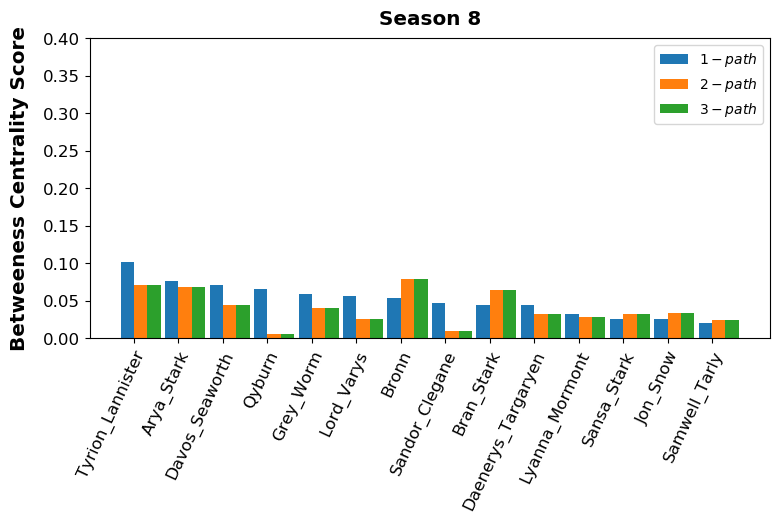

In [115]:
labels = Array{String, 1}()
s1 = Array{Float64, 1}()
s2 = Array{Float64, 1}()
s3 = Array{Float64, 1}()

for elem in sorted_data
    push!(labels, string(elem.first))
    push!(s1, elem.second[1])
    push!(s2, elem.second[2])
    push!(s3, elem.second[3])
end

# println(labels)
# println(hg_degs)
# println(g_degs)

clf()
fig = plt.figure(figsize=(8, 5))
#ax = fig.add_subplot(111)
ax = plt.axes([0.12, 0.32, 0.85, 0.6])

pos = collect(1:length(labels))# the x locations for the groups
width = 0.3  # the width of the bars

s1_rects = ax.bar(pos .- width/2, s1, width, label=L"$1-path$")
s2_rects = ax.bar(pos .+ width/2, s2, width, label=L"$2-path$")
s3_rects = ax.bar(pos .+ (width+width/2), s2, width, label=L"$3-path$")

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.title("Season 8", pad=10, fontweight="semibold", fontsize="x-large")

#ax.set_ylabel("Betweeness Centrality Score")
plt.ylabel("Betweeness Centrality Score", fontweight="semibold", fontsize="x-large", labelpad=10)
#ax.set_title('Scores by group and gender')
ax.set_xticks(pos)
ax.set_xticklabels(labels)
#ax.set_xticklabels(hand_written_labels[season])
ax.legend()

ax.set_yticks(collect(range(0, stop=(.40 > maximum(s1) ? .4 : maximum(s1)), step=0.05))) #(season == 8 ? 25 : 10)

plt.setp( ax.xaxis.get_majorticklabels(), rotation=65, ha="right", rotation_mode="anchor")
#plt.xticks(rotation=65)
plt.tick_params(labelsize="large")